In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
agg_data = pd.read_csv("/Volumes/TwoTeras/Resources/Aggregated_Visits.csv")
agg_data_Session = pd.read_csv("/Volumes/TwoTeras/Resources/Aggregated_Visits_Session.csv")
df_agent = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv")
df_plot_Removed = pd.read_csv("/Volumes/TwoTeras/Graph_Stuff/CSVs/df_plot_Removed.csv")
visits_counts_extended = pd.read_csv("/Volumes/TwoTeras/Resources/Complete_Visits.csv")
likelihood_subjects = pd.read_csv("/Volumes/TwoTeras/Graph_Stuff/CSVs/Probabilities_per_Participant_grouped.csv")

In [3]:
likelihood_subjects.head()

,Experiment,Strategy,Session,mean_value
0,Control,Cons,1,0.212469
1,Control,Cons,2,0.436152
2,Control,Cons,3,0.536833
3,Control,Cons,4,0.556377
4,Control,Cons,5,0.633813


In [4]:
grouped_stats = df_plot_Removed.groupby(['Experiment', 'Session', 'Strategy'])['Value'].agg(['mean', 'std']).reset_index()

# Display the result
print(grouped_stats)

   Experiment  Session Strategy      mean       std
0     Control        1     Cons  0.197674  0.086983
1     Control        1     Expl  0.802326  0.086983
2     Control        2     Cons  0.452495  0.202125
3     Control        2     Expl  0.547505  0.202125
4     Control        3     Cons  0.527063  0.171236
5     Control        3     Expl  0.472937  0.171236
6     Control        4     Cons  0.544624  0.176142
7     Control        4     Expl  0.455376  0.176142
8     Control        5     Cons  0.585729  0.180583
9     Control        5     Expl  0.414271  0.180583
10     Exp1&2        1     Cons  0.470554  0.163132
11     Exp1&2        1     Expl  0.529446  0.163132
12     Exp1&2        2     Cons  0.507316  0.136737
13     Exp1&2        2     Expl  0.492684  0.136737
14     Exp1&2        3     Cons  0.558452  0.126706
15     Exp1&2        3     Expl  0.441548  0.126706
16     Exp1&2        4     Cons  0.585328  0.176284
17     Exp1&2        4     Expl  0.414672  0.176284
18     Exp1&

In [5]:
df_agent.head()

,ParticipantId,Session,StrategyCount,StrategyPerc,Strategy,Decision,Total,Experiment
0,1754,1,7.0,0.22,Conservative,AgentAtChosen,32.0,Exp1
1,1754,1,25.0,0.78,Explorative,AgentAtChosen,32.0,Exp1
2,1754,1,6.0,0.24,Conservative,AgentAtNotChosen,25.0,Exp1
3,1754,1,19.0,0.76,Explorative,AgentAtNotChosen,25.0,Exp1
4,1754,1,2.0,0.12,Conservative,AgentAtBoth,17.0,Exp1


In [6]:
df_agent_Chosen = df_agent[df_agent['Decision'] == 'AgentAtChosen'].copy()

In [7]:
df_agent_Chosen.head()

,ParticipantId,Session,StrategyCount,StrategyPerc,Strategy,Decision,Total,Experiment
0,1754,1,7.0,0.22,Conservative,AgentAtChosen,32.0,Exp1
1,1754,1,25.0,0.78,Explorative,AgentAtChosen,32.0,Exp1
8,1754,2,22.0,0.45,Conservative,AgentAtChosen,49.0,Exp1
9,1754,2,27.0,0.55,Explorative,AgentAtChosen,49.0,Exp1
16,1754,3,36.0,0.59,Conservative,AgentAtChosen,61.0,Exp1


In [8]:
df_plot_Removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.3     870 non-null    int64  
 1   Unnamed: 0.2     870 non-null    int64  
 2   Unnamed: 0.1     870 non-null    int64  
 3   Unnamed: 0       870 non-null    int64  
 4   Experiment       870 non-null    object 
 5   Session          870 non-null    int64  
 6   Strategy         870 non-null    object 
 7   Row              870 non-null    int64  
 8   Column           870 non-null    int64  
 9   Value            870 non-null    float64
 10  ExperimentGroup  870 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 74.9+ KB


In [9]:
# Vectorized operation for categorizing experiments
def categorize_experiment_vectorized(df):
    conditions = [
        df['Experiment'].isin(['Exp1', 'Exp2', 'Exp1_2', 'Exp1&2']),
    ]
    choices = [
        'City with \n Agents',
    ]
    default = 'Control'
    
    # Use np.select for vectorized conditional operation
    df['ExperimentGroup'] = np.select(conditions, choices, default=default)

# Apply the vectorized function to each DataFrame
categorize_experiment_vectorized(df_agent)

categorize_experiment_vectorized(agg_data)
categorize_experiment_vectorized(agg_data_Session)
categorize_experiment_vectorized(df_plot_Removed)
categorize_experiment_vectorized(visits_counts_extended)
categorize_experiment_vectorized(df_agent_Chosen)
categorize_experiment_vectorized(likelihood_subjects)

In [10]:
likelihood_subjects.tail()

,Experiment,Strategy,Session,mean_value,ExperimentGroup
15,Exp1&2,Expl,1,0.621010,City with \n Agents
16,Exp1&2,Expl,2,0.481824,City with \n Agents
17,Exp1&2,Expl,3,0.424685,City with \n Agents
18,Exp1&2,Expl,4,0.411381,City with \n Agents
19,Exp1&2,Expl,5,0.382514,City with \n Agents


In [11]:
df_plot_Removed['ExperimentGroup'].unique()[::-1]

array(['City with \n Agents', 'Control'], dtype=object)

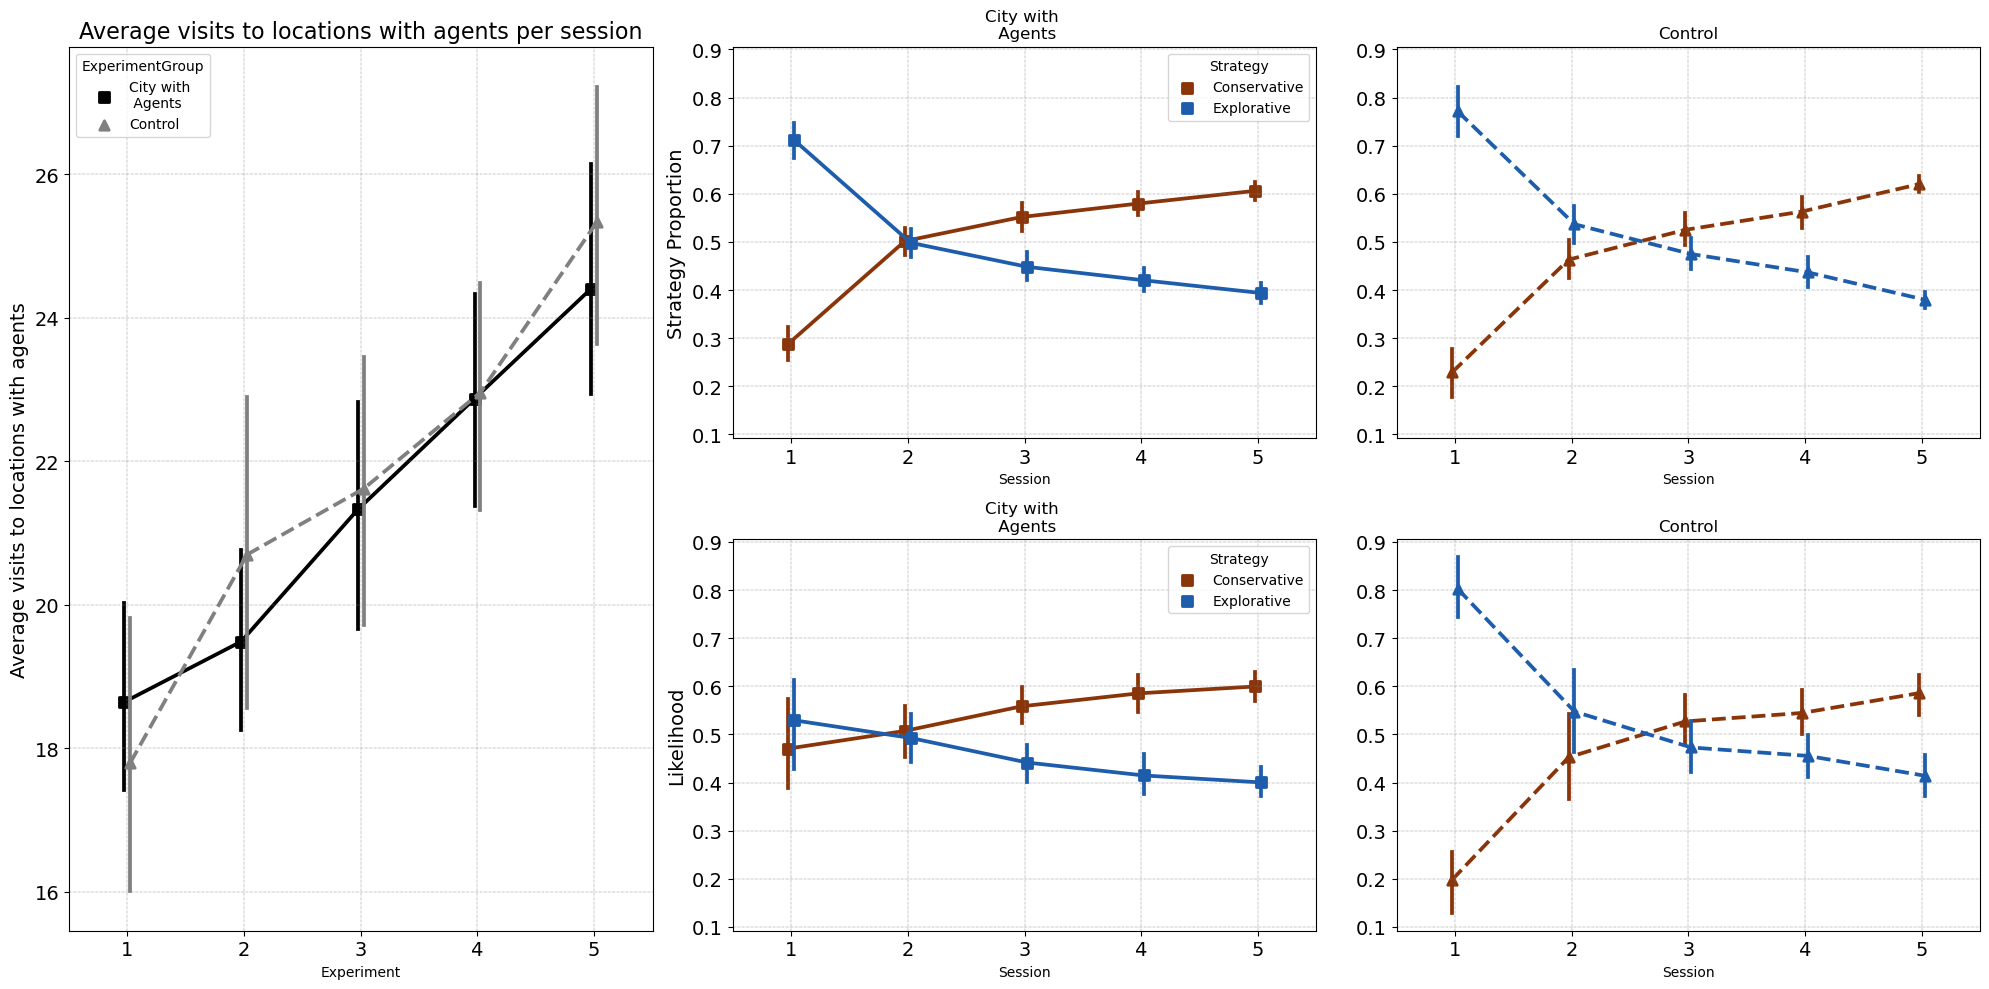

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming agg_data, df_plot_Removed, and df_agent are predefined as in your context

# Define the color palette
color_palette = ["#8a3409ff", "#1d5dabff", "#ccbe61ff"]

# Set the order of columns, assuming 'ExperimentGroup' is the correct column name for df_plot_Removed
col_order = df_plot_Removed['ExperimentGroup'].unique()[::-1]

# Create the figure and grid specification
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 3)

#Settings
marker = ['s', '^']
linestyle = ["-", "--"]

# Plot the big plot on the left
ax_big = plt.subplot(gs[:, 0])
palette1 = ['black','gray']

sns.pointplot(x='SessionNr', y='VisitCounts', data=visits_counts_extended, dodge=True,
                      hue='ExperimentGroup', markers=marker,  linestyles=linestyle, palette=palette1)
ax_big.set_xlabel('Experiment')
ax_big.set_ylabel('Average visits to locations with agents')
ax_big.set_title('Average visits to locations with agents per session', fontsize=16)



# Assuming df_agent is predefined and filtered for 'AgentAtChosen'
df_exp = df_agent[df_agent['Decision'] == 'AgentAtChosen']

# Subplots for point plots
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2], sharey=ax2)
ax4 = plt.subplot(gs[1, 1], sharey=ax2)
ax5 = plt.subplot(gs[1, 2], sharey=ax2)

# Define experiments for point plots
experiments = ('City with \n Agents', 'Control')

# Plotting point plots
axes = [ax2, ax3, ax4, ax5]
for i, exp in enumerate(experiments):
    sns.pointplot(x='Session', y='StrategyPerc', data=df_exp[df_exp['ExperimentGroup'] == exp],
                  hue='Strategy', palette=color_palette, dodge=True,markers=marker[i], linestyles=linestyle[i], ax=axes[i]).set_title(exp)
    
for i, exp in enumerate(experiments):  
    ax = [ax4, ax5][i]
    sns.pointplot(x='Session', y='Value', data=df_plot_Removed[df_plot_Removed['ExperimentGroup'] == exp],
        hue='Strategy', palette=color_palette, dodge=True, markers=marker[i], linestyles=linestyle[i], ax=ax).set_title(exp)

ax2.set_ylabel('Strategy Proportion')
ax4.set_ylabel('Likelihood')
# Get the legend handles and labels from ax2
handles, labels = ax2.get_legend_handles_labels()

# Create a new legend on ax4 using the handles and labels from ax2
ax4.legend(handles, labels, title='Strategy', loc='best')
    
# Apply styling to all subplots uniformly
for ax in [ax_big] + axes:
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.get_label().set_fontsize(14)

for ax in [ax3, ax5]:
    ax.legend().set_visible(False)
    ax.set_ylabel('')
    
    

plt.tight_layout()
plt.show()


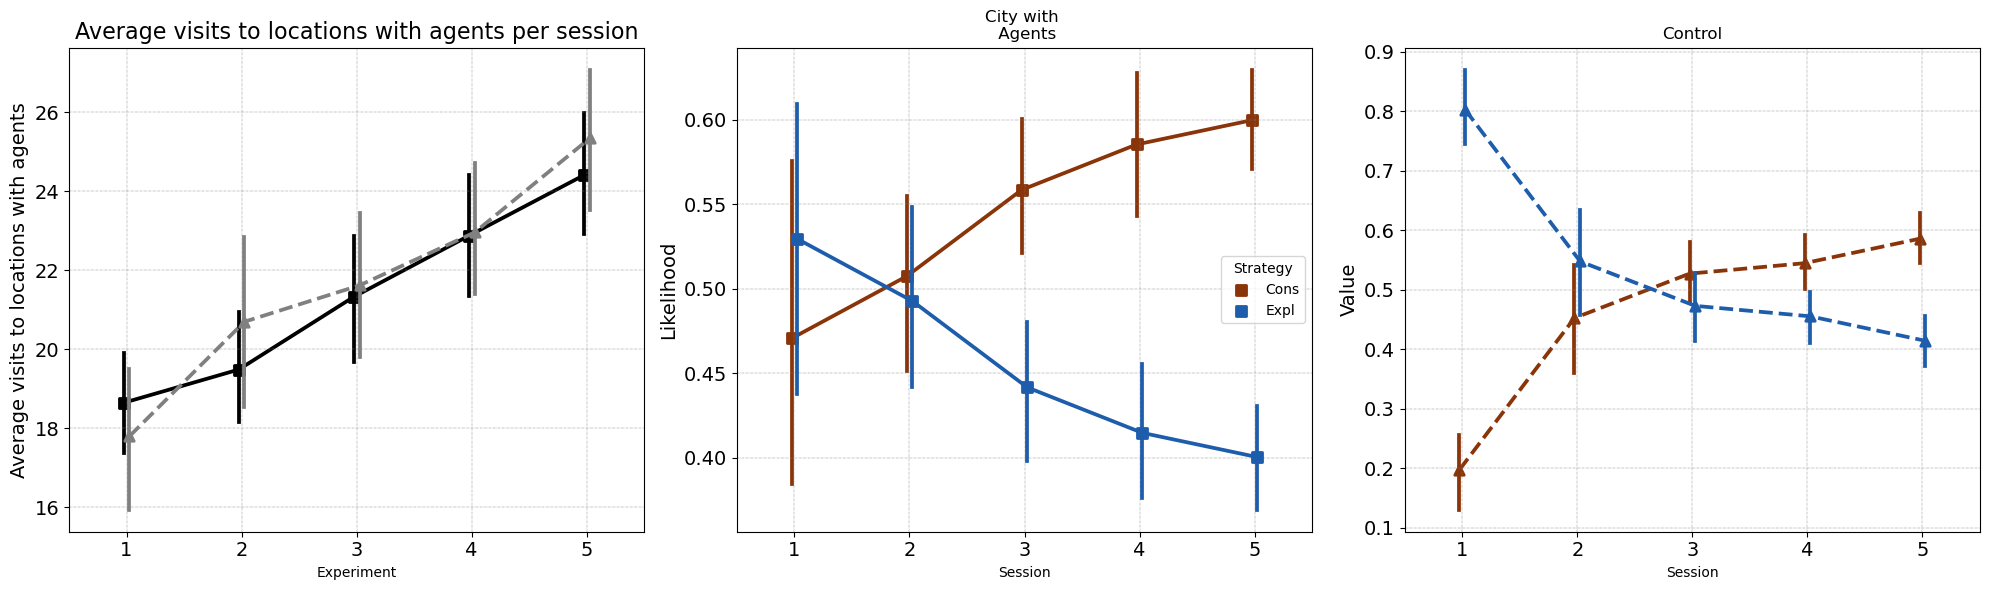

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming agg_data, df_plot_Removed, and df_agent are predefined as in your context

# Define the color palette
color_palette = ["#8a3409ff", "#1d5dabff", "#ccbe61ff"]

# Create the figure and grid specification
fig = plt.figure(figsize=(20, 6))  # Adjusted figure size for a single row layout
gs = gridspec.GridSpec(1, 3)  # Adjusted to 1 row, 3 columns

# Settings
marker = ['s', '^']
linestyle = ["-", "--"]

# Plot the big plot on the first column
ax_big = plt.subplot(gs[0, 0])
palette1 = ['black', 'gray']

sns.pointplot(x='SessionNr', y='VisitCounts', data=visits_counts_extended, dodge=True,
              hue='ExperimentGroup', markers=marker, linestyles=linestyle, palette=palette1, ax=ax_big)
ax_big.set_xlabel('Experiment')
ax_big.set_ylabel('Average visits to locations with agents')
ax_big.set_title('Average visits to locations with agents per session', fontsize=16)

# Subplots for point plots, now on the same row
ax4 = plt.subplot(gs[0, 1])
ax5 = plt.subplot(gs[0, 2])

# Define experiments for point plots
experiments = ('City with \n Agents', 'Control')

# Plotting point plots for ax4 and ax5
for i, exp in enumerate(experiments):
    ax = [ax4, ax5][i]
    sns.pointplot(x='Session', y='Value', data=df_plot_Removed[df_plot_Removed['ExperimentGroup'] == exp],
                  hue='Strategy', palette=color_palette, dodge=True, markers=marker[i], linestyles=linestyle[i], ax=ax).set_title(exp)

ax4.set_ylabel('Likelihood')

# Get the legend handles and labels from ax4
handles, labels = ax4.get_legend_handles_labels()

# Adjusting legends and styles
for ax in [ax_big, ax4, ax5]:
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.get_label().set_fontsize(14)
    ax.legend().set_visible(False)

# Show legend on ax4 with adjusted settings
ax4.legend(handles, labels, title='Strategy', loc='best').set_visible(True)

plt.tight_layout()
plt.show()


In [14]:
df_agent_Chosen.to_csv("/Volumes/TwoTeras/Graph_Stuff/CSVs/visits_counts_extended.csv")
df_plot_Removed.to_csv("/Volumes/TwoTeras/Graph_Stuff/CSVs/df_plot_Removed.csv")

In [15]:
df_agent_Chosen.head()

,ParticipantId,Session,StrategyCount,StrategyPerc,Strategy,Decision,Total,Experiment,ExperimentGroup
0,1754,1,7.0,0.22,Conservative,AgentAtChosen,32.0,Exp1,City with \n Agents
1,1754,1,25.0,0.78,Explorative,AgentAtChosen,32.0,Exp1,City with \n Agents
8,1754,2,22.0,0.45,Conservative,AgentAtChosen,49.0,Exp1,City with \n Agents
9,1754,2,27.0,0.55,Explorative,AgentAtChosen,49.0,Exp1,City with \n Agents
16,1754,3,36.0,0.59,Conservative,AgentAtChosen,61.0,Exp1,City with \n Agents


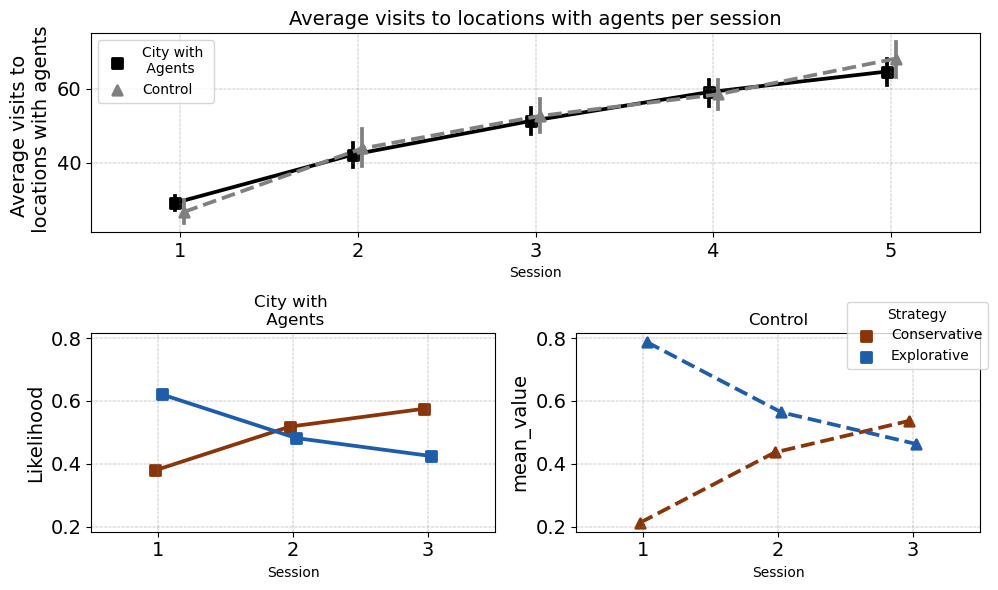

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming agg_data, df_plot_Removed, and df_agent are predefined as in your context

# Define the color palette
color_palette = ["#8a3409ff", "#1d5dabff", "#ccbe61ff"]

# Create the figure and grid specification
fig = plt.figure(figsize=(10, 6))  # Adjusted back to accommodate the new layout
gs = gridspec.GridSpec(2, 2)  # 2 rows, 2 columns

# Settings
marker = ['s', '^']
linestyle = ["-", "--"]

# Plot the big plot on the first row spanning all columns
ax_big = plt.subplot(gs[0, :])  # Spanning all columns in the first row
palette1 = ['black', 'gray']

sns.pointplot(x='Session', y='Total', data=df_agent_Chosen, dodge=True,
              hue='ExperimentGroup', markers=marker, linestyles=linestyle, palette=palette1, ax=ax_big)
ax_big.set_xlabel('Session')
ax_big.set_ylabel('Average visits to \n locations with agents')
ax_big.set_title('Average visits to locations with agents per session', fontsize=14)

# Subplots for point plots, positioned in the second row
ax4 = plt.subplot(gs[1, 0])  # Second row, first column
ax5 = plt.subplot(gs[1, 1], sharey=ax4)  # Second row, second column, sharing y-axis with ax4

# Define experiments for point plots
experiments = ('City with \n Agents', 'Control')

# Filtering df_plot_Removed for Sessions 1 and 2
df_filtered = likelihood_subjects[likelihood_subjects['Session'].isin([1, 2, 3])]

# Plotting point plots for ax4 and ax5 with filtered data
for i, exp in enumerate(experiments):
    ax = [ax4, ax5][i]
    sns.pointplot(x='Session', y='mean_value', data=df_filtered[df_filtered['ExperimentGroup'] == exp],
                  hue='Strategy', palette=color_palette, dodge=True, markers=marker[i], linestyles=linestyle[i], ax=ax).set_title(exp)

ax4.set_ylabel('Likelihood')

# Handling legends
# Remove existing legends first
ax4.legend().set_visible(False)


# Get the legend handles and labels from one of the axes (ax4 or ax5, since they share the same legend)
handles, labels = ax4.get_legend_handles_labels()
labels = ['Conservative', 'Explorative']

# Create a shared legend for ax4 and ax5 at a suitable location
fig.legend(handles, labels, title='Strategy', loc='upper right', bbox_to_anchor=(1, 0.5))
for ax in [ax_big, ax4, ax5]:
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.get_label().set_fontsize(14)
    ax.legend().set_visible(False)


# Display the legend for ax_big
ax_big_legend = ax_big.get_legend()
ax_big_legend.set_visible(True)
ax5.set_visible(True)

plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Exploratory_Bias_Likelihood.png",  bbox_inches="tight",
            pad_inches=0.3)
plt.show()


In [17]:
df_plot_Removed.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Experiment,Session,Strategy,Row,Column,Value,ExperimentGroup
0,0,0,0,0,Control,1,Cons,1,0,0.233860,Control
1,1,1,1,1,Control,1,Cons,2,0,0.268848,Control
2,2,2,2,2,Control,1,Cons,2,1,0.212698,Control
3,3,3,3,3,Control,1,Cons,3,0,0.050000,Control
4,4,4,4,4,Control,1,Cons,3,1,0.277778,Control


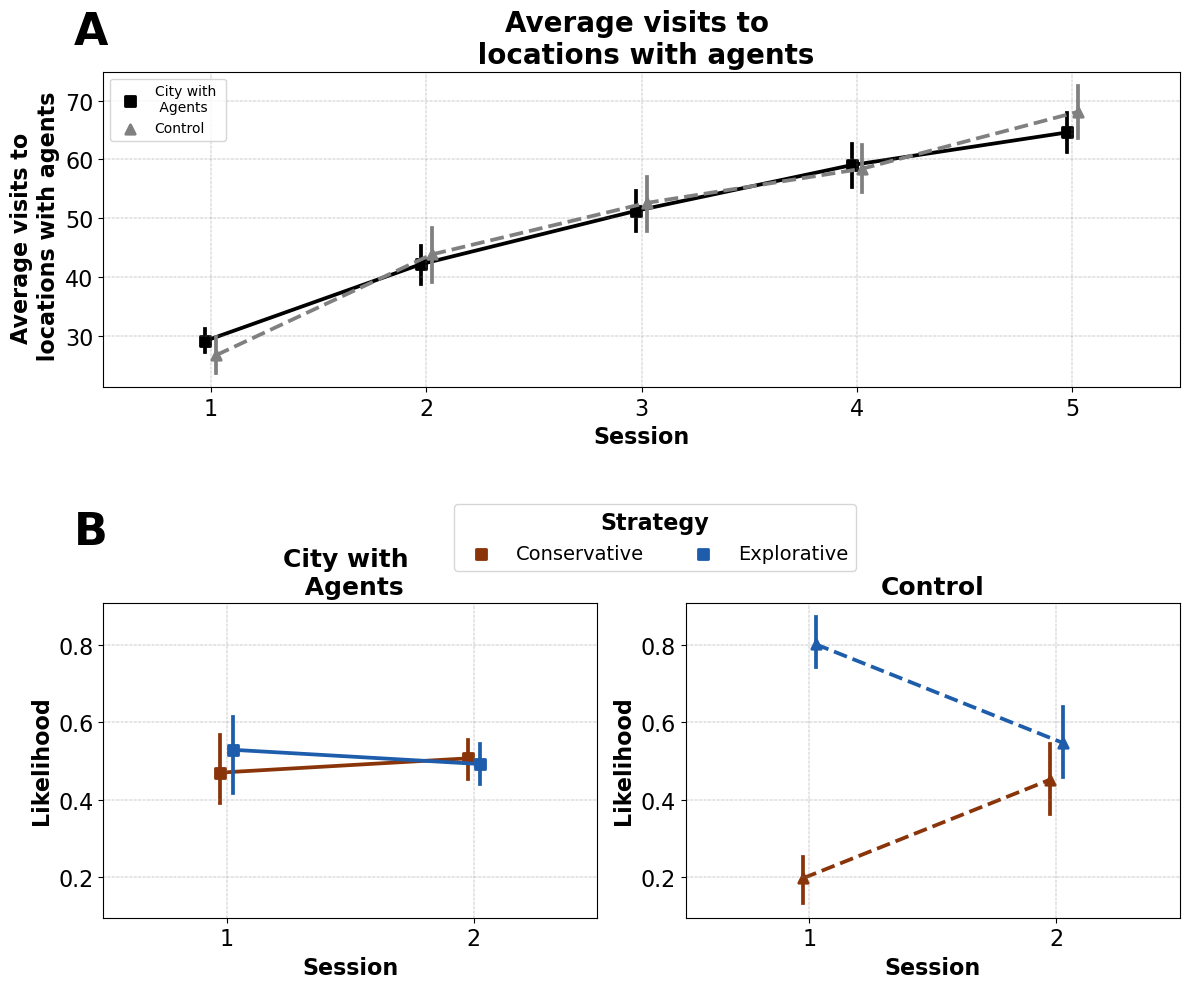

In [18]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming agg_data, df_plot_Removed, and df_agent are predefined as in your context

# Define the color palette
color_palette = ["#8a3409ff", "#1d5dabff", "#ccbe61ff"]

# Create the figure and grid specification
fig = plt.figure(figsize=(12, 10))  # Adjusted back to accommodate the new layout
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 0.2, 1])  # 3 rows, 2 columns with adjusted height ratios

# Settings
marker = ['s', '^']
linestyle = ["-", "--"]

# Plot the big plot on the first row spanning all columns
ax_big = plt.subplot(gs[0, :])  # Spanning all columns in the first row
palette1 = ['black', 'gray']

sns.pointplot(x='Session', y='Total', data=df_agent_Chosen, dodge=True,
              hue='ExperimentGroup', markers=marker, linestyles=linestyle, palette=palette1, ax=ax_big)
ax_big.set_xlabel('Session', fontsize=18, fontweight='bold')
ax_big.set_ylabel('Average visits to  \n locations with agents', fontsize=18, fontweight='bold')
ax_big.set_title('Average visits to \n locations with agents', fontsize=20, fontweight='bold')

# Legend plot
ax_legend = plt.subplot(gs[1, :])  # Legend spanning the second row
ax_legend.axis('off')  # Hide the axis for the legend plot

# Subplots for point plots, positioned in the third row
ax4 = plt.subplot(gs[2, 0])  # Third row, first column
ax5 = plt.subplot(gs[2, 1], sharey=ax4)  # Third row, second column, sharing y-axis with ax4

# Define experiments for point plots
experiments = ('City with \n Agents', 'Control')

# Filtering df_plot_Removed for Sessions 1 and 2
df_filtered = df_plot_Removed[df_plot_Removed['Session'].isin([1, 2])]
df_filtered

# Plotting point plots for ax4 and ax5 with filtered data and setting y-axis labels
common_ylabel = "Likelihood"
for i, exp in enumerate(experiments):
    ax = [ax4, ax5][i]
    sns.pointplot(x='Session', y='Value', data=df_filtered[df_filtered['ExperimentGroup'] == exp],
                  hue='Strategy', palette=color_palette, dodge=True, markers=marker[i], linestyles=linestyle[i], ax=ax).set_title(exp, fontsize=18, fontweight='bold')
    ax.set_ylabel(common_ylabel, fontsize=18, fontweight='bold')  # Setting the y-axis label directly after plotting
    ax.set_xlabel('Session', fontsize=18, fontweight='bold')

# Apply uniform styling and handle legends
for ax in [ax_big, ax4, ax5]:
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=16)
    ax.yaxis.get_label().set_fontsize(16)
    ax.yaxis.get_label().set_fontweight('bold')
    ax.xaxis.get_label().set_fontsize(16)
    ax.xaxis.get_label().set_fontweight('bold')
    ax.legend().set_visible(False)

# Handling legends after styling
# Show the figure-wide legend for strategies based on ax4's legend info
handles, labels = ax4.get_legend_handles_labels()
labels = ["Conservative", "Explorative"]
legend = fig.legend(handles, labels, title='Strategy', loc='upper center', bbox_to_anchor=(0.55, 0.50), fontsize=14, ncol=2)
plt.setp(legend.get_title(), fontsize=16, fontweight='bold')

# Show ax_big's legend
ax_big_legend = ax_big.get_legend()
ax_big_legend.set_visible(True)

annotations = {
    'A': (0.08, 0.95),
    'B': (0.08, 0.45)
    # Add more annotations as needed
}

# Loop through annotations and add them to the figure
for text, location in annotations.items():
    fig.text(location[0], location[1], text, fontsize=32, fontweight='bold', fontfamily='sans-serif', ha='center')

plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Exploratory_Bias_Likelihood.png", bbox_inches="tight", pad_inches=0.3)
plt.show()


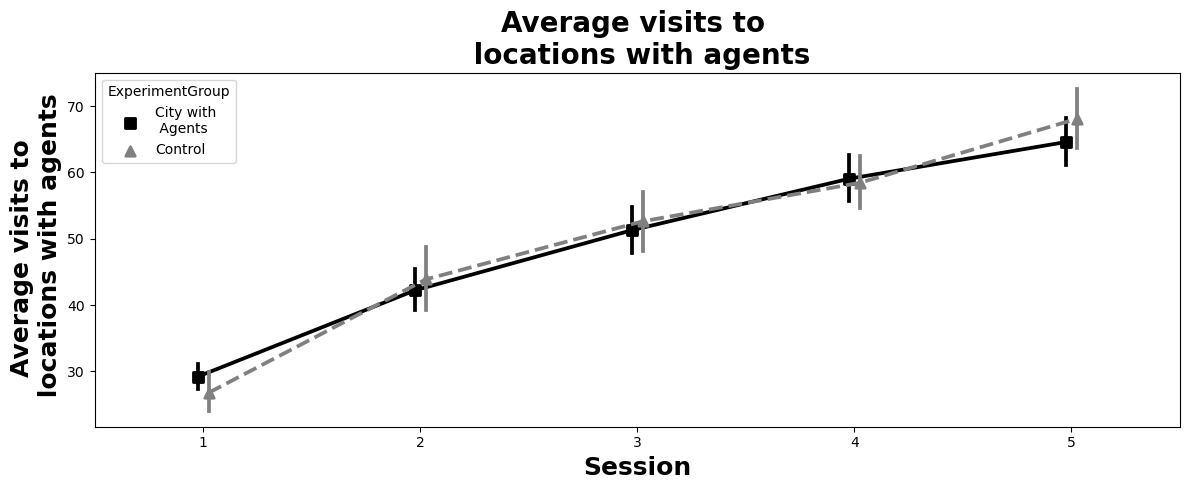

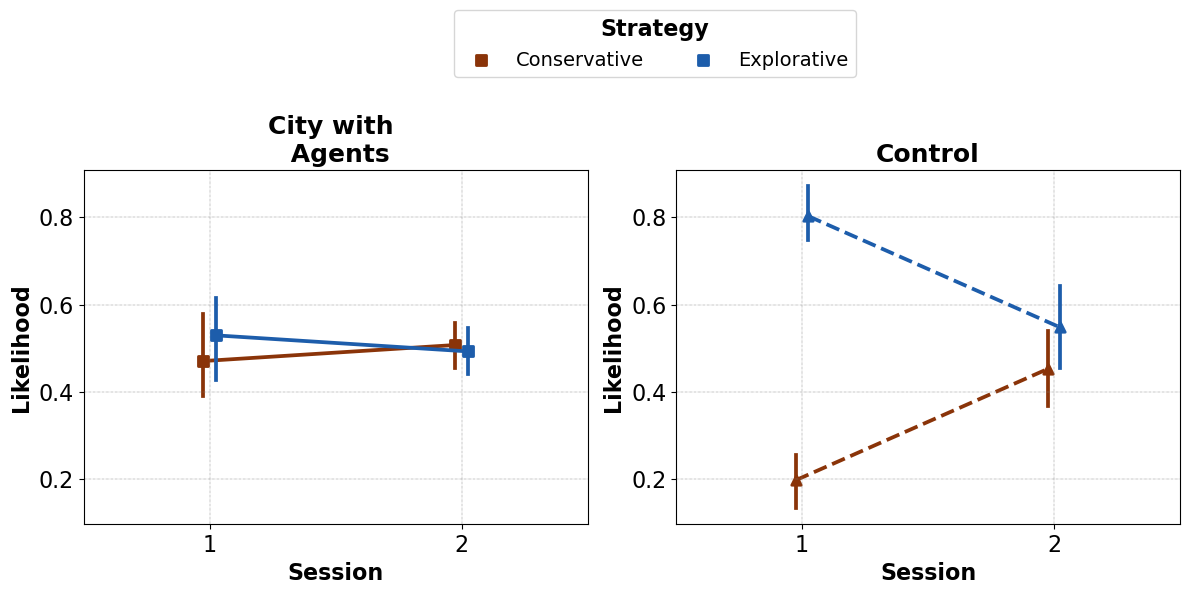

In [19]:
# --- Top Plot ---

fig_top = plt.figure(figsize=(12, 5))  # Adjusted figure size for the top plot
gs_top = gridspec.GridSpec(1, 1)  # Only one grid spec for the top plot

# Settings
marker = ['s', '^']
linestyle = ["-", "--"]

# Plot the big plot on the figure
ax_big = plt.subplot(gs_top[0])  # Single subplot
palette1 = ['black', 'gray']

sns.pointplot(x='Session', y='Total', data=df_agent_Chosen, dodge=True,
              hue='ExperimentGroup', markers=marker, linestyles=linestyle, palette=palette1, ax=ax_big)
ax_big.set_xlabel('Session', fontsize=18, fontweight='bold')
ax_big.set_ylabel('Average visits to  \n locations with agents', fontsize=18, fontweight='bold')
ax_big.set_title('Average visits to \n locations with agents', fontsize=20, fontweight='bold')

# Show ax_big's legend
ax_big_legend = ax_big.get_legend()
ax_big_legend.set_visible(True)

# Add annotation
#fig_top.text(0.08, 0.95, 'A', fontsize=32, fontweight='bold', fontfamily='sans-serif', ha='center')

# Save the top plot
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Exploratory_Bias_Likelihood_Top.jpg", bbox_inches="tight", pad_inches=0.3,  dpi=300, format='jpg')

# --- Bottom Plots ---

fig_bottom = plt.figure(figsize=(12, 5))  # Adjusted figure size for the bottom plots
gs_bottom = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Two subplots with equal width

# Subplots for point plots
ax4 = plt.subplot(gs_bottom[0])  # Left subplot
ax5 = plt.subplot(gs_bottom[1], sharey=ax4)  # Right subplot, sharing y-axis with ax4

# Define experiments for point plots
experiments = ('City with \n Agents', 'Control')

# Filtering df_plot_Removed for Sessions 1 and 2
df_filtered = df_plot_Removed[df_plot_Removed['Session'].isin([1, 2])]

# Plotting point plots for ax4 and ax5 with filtered data and setting y-axis labels
common_ylabel = "Likelihood"
for i, exp in enumerate(experiments):
    ax = [ax4, ax5][i]
    sns.pointplot(x='Session', y='Value', data=df_filtered[df_filtered['ExperimentGroup'] == exp],
                  hue='Strategy', palette=color_palette, dodge=True, markers=marker[i], linestyles=linestyle[i], ax=ax).set_title(exp, fontsize=18, fontweight='bold')
    ax.set_ylabel(common_ylabel, fontsize=18, fontweight='bold')  # Setting the y-axis label directly after plotting
    ax.set_xlabel('Session', fontsize=18, fontweight='bold')

# Apply uniform styling and handle legends
for ax in [ax4, ax5]:
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=16)
    ax.yaxis.get_label().set_fontsize(16)
    ax.yaxis.get_label().set_fontweight('bold')
    ax.xaxis.get_label().set_fontsize(16)
    ax.xaxis.get_label().set_fontweight('bold')
    ax.legend().set_visible(False)

# Show the figure-wide legend for strategies based on ax4's legend info
handles, labels = ax4.get_legend_handles_labels()
labels = ["Conservative", "Explorative"]
legend = fig_bottom.legend(handles, labels, title='Strategy', loc='upper center', bbox_to_anchor=(0.55, 1.2), fontsize=14, ncol=2)
plt.setp(legend.get_title(), fontsize=16, fontweight='bold')

# Add annotation
#fig_bottom.text(0.08, 0.95, 'B', fontsize=32, fontweight='bold', fontfamily='sans-serif', ha='center')

# Save the bottom plots
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Exploratory_Bias_Likelihood_Bottom.jpg", bbox_inches="tight", pad_inches=0.3,  dpi=300, format='jpg')

plt.show()


In [20]:
df_filtered.groupby(['Experiment', 'Strategy'])['Value'].agg(['mean', 'std'])

mean       std
Experiment Strategy                    
Control    Cons      0.388790  0.211059
           Expl      0.611210  0.211059
Exp1&2     Cons      0.496387  0.143758
           Expl      0.503613  0.143758